# Projet CISD IS329 2022-2023 : Auto Encodeurs

```
 Idée farfelue : Implémenter un autoencoder pour encoder des autos 
```

![https://ai.stanford.edu/~jkrause/cars/car_dataset.html](cars.png)

On va travailler sur 100 photos de voitures récupérées d'un dataset public. 

Le but de ce projet est d'utiliser des réseaux de neurones pour compresser ces images.

On va procéder en 3 étapes :
 - Création d'une baseline : Compression sans réseau de neurones
 - Création d'un modèle Deep Learning : Compression avec un auto-encodeur
 - Améliorations !

## Déroulé du projet
 - Formez des binomes : A me communiquer lors du TP du 19 janvier.
 - Réalisez le projet en complétant à minima ce notebook : Notebook à me fournir le jour de la soutenance le 26 janvier.
 - Préparez des slides pour une présentation de 10min : 
   - Présentez la démarche que vous avez utilisé pour résoudre le problème
   - Présentez les différentes techniques utilisées dans votre projet en justifiant vos choix
   - Il peut être intéressant d'évoquer des pistes que vous avez exploré et qui n'ont pas marché

## Les critères de notation

3 points seront pris en compte pour la notation du projet : 
- La documentation/les commentaires du code/notebook que vous restituez
- Votre prestation sur la présentation le jour de la soutenance
- Les pistes supplémentaires explorées en ouverture du projet


## Entrée en matière : Baseline
### Compression d'images à base de [SVD](https://fr.wikipedia.org/wiki/D%C3%A9composition_en_valeurs_singuli%C3%A8res)

Nos images (dans le répertoire cars_sample) sont composées de 3 canaux de couleurs (RGB). Chaque canal peut être représenté par une matrice que l'on peut décomposer comme suit : 
$$M=U\Sigma V^{*}\,\!$$

Dans la pratique on va stacker les 3 canaux pour obtenir une matrice M de taille $m$ x $3n$ pour une image de taille $m$ x $n$.

La matrice $\Sigma$ a ses coefficients diagonnaux réels positifs ou nuls, ce sont les valeurs singulières, et ses coefficients extra diagonnaux nuls. On considère de plus que les valeurs singulières sont décroissantes $\Sigma_{ii} > \Sigma_{jj}$ si $i < j$.

Notons 
$$M^{k}=U\Sigma^{k} V^{*}\,\!$$

Avec $\Sigma^{k}$ la matrice telle que $\Sigma^{k}_{ii} = \Sigma_{ii}$ pour tout $i <= k$, le reste de ses coefficients étants nuls.

Question :
A l'aide des bibliothèques scientifiques python (scipy) calculez la décomposition SVD.

Affichage d'une image

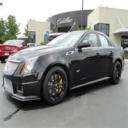

In [1]:
import glob
import random
from PIL import Image

image_name = random.choice(glob.glob("cars_sample/*"))
img = Image.open(image_name)
img

Définissez une fonction qui prend en entrée une image, calcule la décomposition SVD de l'image

Définissez une fonction qui prend en entrée une image et un entier k, calcule la décomposition SVD de l'image et retourne l'approximation $M^{k}$ de cette décomposition

Affichez moi des belles images avant et après compression, avec différents niveaux de compression (faites varier $k$)

On considère que les images initiales sont stockées sous forme de tableaux d'entiers qui représentent tous les pixels de l'image.
 - Quel espace mémoire prend 1 image RGB de taille 128x128 ?

On calcule la décomposition de cette image en utilisant la SVD tronquée, avec k = 64.
 - Comment stockez-vous l'image approximée?
 - Quel espace mémoire prend cette image ?
 - Quel niveau de compression obtenez vous ? (y en a t'il?)

## Compression par autoencodeur

On a vu les autoencodeurs dans le TP5, réutilisez ce type d'architecture. Apprenez votre modèle sur le jeu d'images 'car_sample'.

Mesurez la convergence?

Quelle est la qualité des résultats (affichez les images)

- Quels éléments vous avez besoin de stocker pour sauvegarder les images compressées?
- Quel espace disque est nécessaire pour stocker les 100 images ?
- Quel niveau de compression obtenez vous ?
- Comparez à la SVD 

## Idées d'améliorations :
- Tester d'autres types d'architectures : Est-ce que ce sont les autoencodeurs les architectures les plus adaptées à la compression ?
- Est-ce que l'on peut obtenir les mêmes résultats avec un réseau plus petit ? : Ce principe s'appelle "distillation" sur les réseaux de neurones.
- ...